In [9]:
# The script that is needed to get the data is:

!pip install xeno-canto
!xeno-canto -dl grp:"bats" cnt:"Portugal"

# grp: bats = stands for the group of animals we are filtering on
# q: A = stands for the quality of the recording. The rank starts from A (clear and loud) to E (unclear)
# Therefore, if we want also other qualities, we just select the same group but a different quality
# "cnt" is the country. Portugal has 6 recordings, so it is a good test to check whether it works or not.
# if it works, the next step is select other filters to get data

  Using cached xeno-canto-3.0.tar.gz (9.9 kB)
  Preparing metadata (setup.py) ... done
  Using cached aiofiles-24.1.0-py3-none-any.whl.metadata (10 kB)
Using cached aiofiles-24.1.0-py3-none-any.whl (15 kB)
  Created wheel for xeno-canto: filename=xeno_canto-3.0-py3-none-any.whl size=8706 sha256=4068d8324486d9f640912865bc3233d53b9e4deb6e4f3d2586c350159354e4bf
  Stored in directory: /Users/cristian.mihaiescu/Library/Caches/pip/wheels/4c/12/2f/2b16f9402d1a837dc729365b07a7a9f35227578a27dfb8764c
Successfully built xeno-canto
Retrieving metadata...
^C
Traceback (most recent call last):
  File "/opt/anaconda3/envs/test2/bin/xeno-canto", line 8, in <module>
    sys.exit(main())
  File "/opt/anaconda3/envs/test2/lib/python3.10/site-packages/xenocanto.py", line 391, in main
    asyncio.run(download(params))
  File "/opt/anaconda3/envs/test2/lib/python3.10/asyncio/runners.py", line 44, in run
    return loop.run_until_complete(main)
  File "/opt/anaconda3/envs/test2/lib/python3.10/asyncio/base_ev

Try to find a way to differentiate transformed bat sounds from original bat sounds (above hearing frequency)
Sampling rate is often higher for original sounds. However, for these 2 examples it is the same..


In [2]:
import scipy.io.wavfile as wav

# download some sounds and change this to your path to turn them into spectograms

# sound one sounded transformed to me, sound 2 didn't sound transformed (humans were speaking in the background)
sound_one = "C:/Users/Gebruiker/Downloads/XC935114 - Gewone dwergvleermuis - Pipistrellus pipistrellus.wav"
sound_two = "C:/Users/Gebruiker/Downloads/XC938943 - Gewone dwergvleermuis - Pipistrellus pipistrellus.wav"

sr, _ = wav.read(sound_one)
print(f'transformed sound, sr is {sr}, _ is {_}')

sr, _ = wav.read(sound_two)
print(f'original sound, sr is {sr}, _ is {_}')


transformed sound, sr is 256000, _ is [-57 -92 -35 ...  10  12  91]
original sound, sr is 256000, _ is [ -3   6  18 ... 146 -18  96]


C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_41168\2500559364.py:9: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sr, _ = wav.read(sound_one)


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import spectrogram

In [4]:
def spectogram(data, title:str):
    # If stereo, convert to mono
    if data.ndim > 1:
        data = np.mean(data, axis=1)

    # Generate spectrogram
    f, t, Sxx = spectrogram(data, sr)

    # Plot the spectrogram
    plt.pcolormesh(t, f, np.log(Sxx), shading="gouraud")
    plt.ylabel("Frequency [Hz]")
    plt.xlabel("Time [sec]")
    plt.title(f"Spectrogram of {title}")
    plt.ylim(0, 100000)  # Zoom into the frequency range of interest (up to 100 kHz)
    plt.colorbar(label="Log Intensity")
    plt.show()

In [5]:
sound_three = "C:/Users/Gebruiker/Downloads/XC931826 - Gewone dwergvleermuis - Pipistrellus pipistrellus.wav"
sound_four = "C:/Users/Gebruiker/Downloads/XC934344 - Gewone dwergvleermuis - Pipistrellus pipistrellus.wav"

C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_41168\154078287.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sr, data = wavfile.read(sound_one)


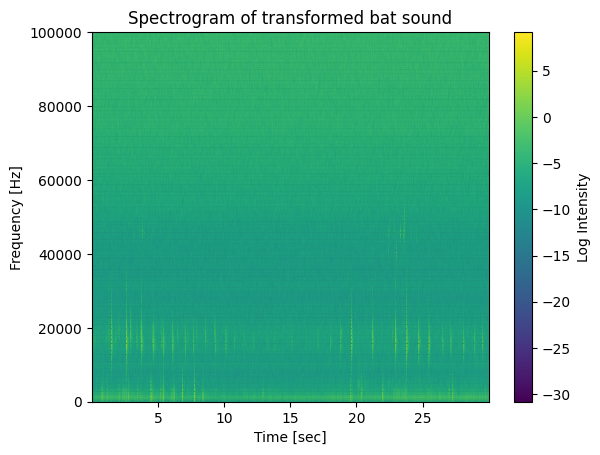

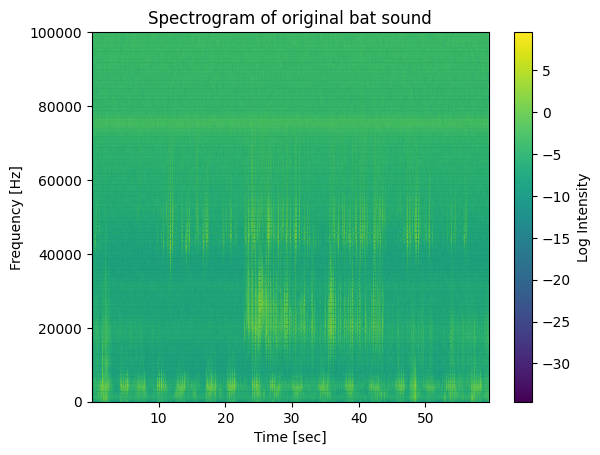

C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_41168\154078287.py:7: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sr, data = wavfile.read(sound_three)


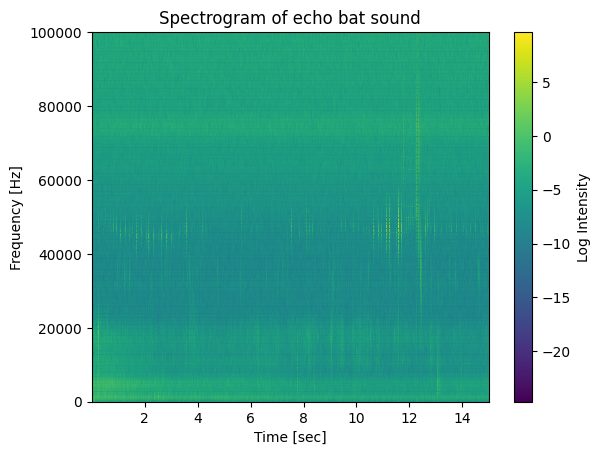

C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_41168\154078287.py:10: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sr, data = wavfile.read(sound_four)


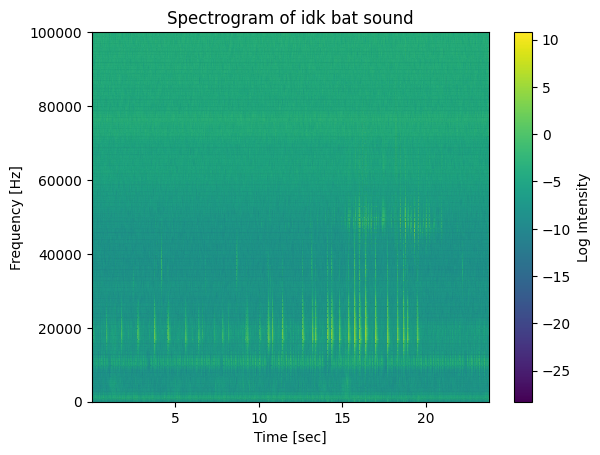

In [6]:

sr, data = wavfile.read(sound_one)
spectogram(data, "transformed bat sound")

sr, data = wavfile.read(sound_two)
spectogram(data, "original bat sound")

sr, data = wavfile.read(sound_three)
spectogram(data, "echo bat sound")

sr, data = wavfile.read(sound_four)
spectogram(data, "idk bat sound")

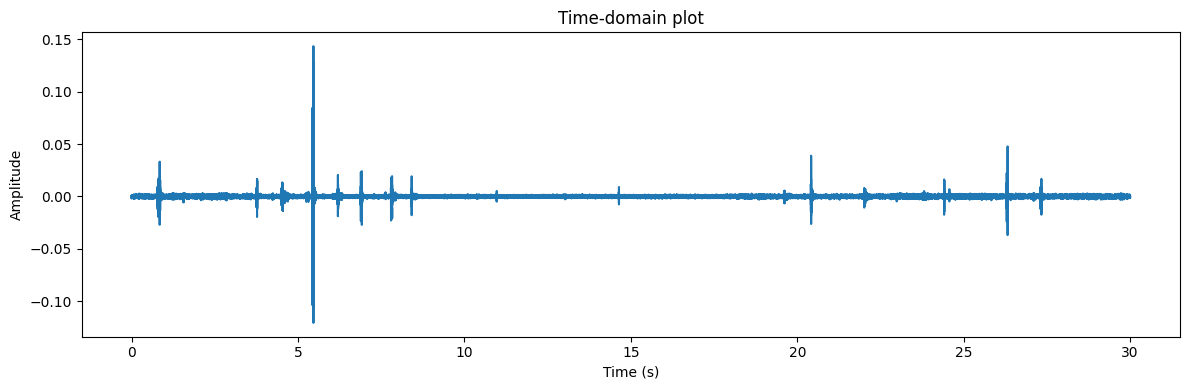

In [7]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Load audio file
y, sr = librosa.load(sound_one)  # y = waveform (amplitude), sr = sample rate

# Create time axis in seconds
time = np.linspace(0, len(y) / sr, num=len(y))

# Plot
plt.figure(figsize=(12, 4))
plt.plot(time, y)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Time-domain plot")
plt.tight_layout()
plt.show()

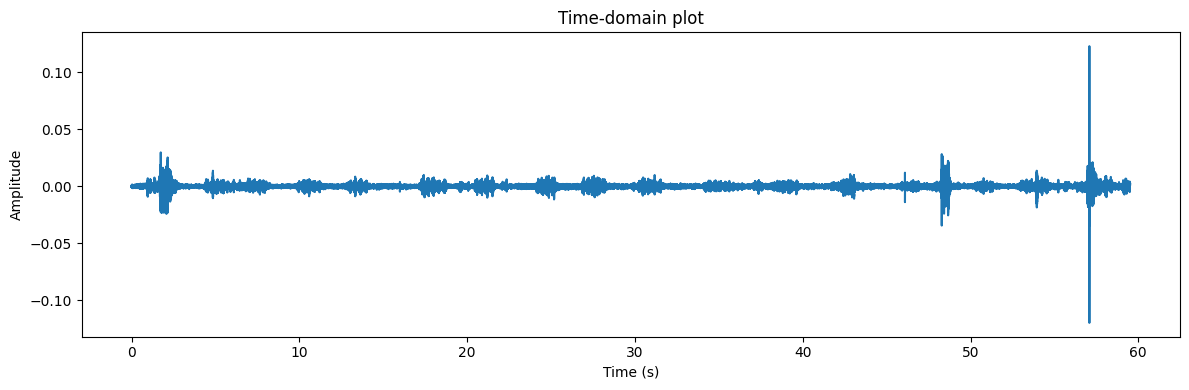

In [8]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Load audio file
y, sr = librosa.load(sound_two)  # y = waveform (amplitude), sr = sample rate

# Create time axis in seconds
time = np.linspace(0, len(y) / sr, num=len(y))

# Plot
plt.figure(figsize=(12, 4))
plt.plot(time, y)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Time-domain plot")
plt.tight_layout()
plt.show()